<a href="https://colab.research.google.com/github/mojeda805/devtraining-needit-utah/blob/master/FDS_Project_FullCode_(2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 1898
Number of columns: 9


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isna().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [ ]:
#There are no missing values in the data

#### Observations:No missing values in the data


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#Observations: Minimum Value is 20 min and maximum value to prepare the data is 35 min


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
df[df['rating'] == 'Not given'].shape[0]

736

In [ ]:
df.rating.value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


In [ ]:
#There are 736 where the rating was not given
#df['rating']= df['rating'].replace('Not given', 0) to repalce the Not given with a 0

#### Observations: 736 Ratings were not given or around 39% of the ratings


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
# Write the code here
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


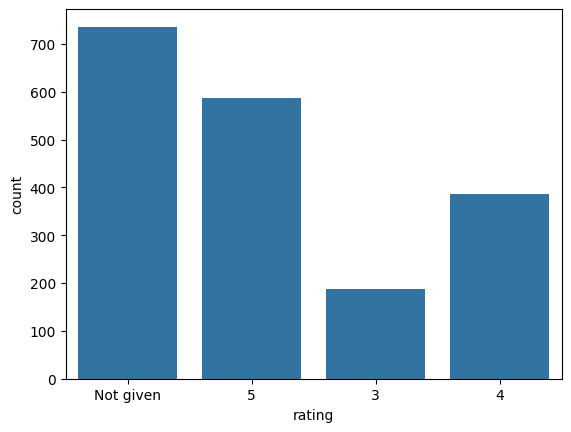

In [ ]:
sns.countplot(data=df, x='rating')
plt.show()

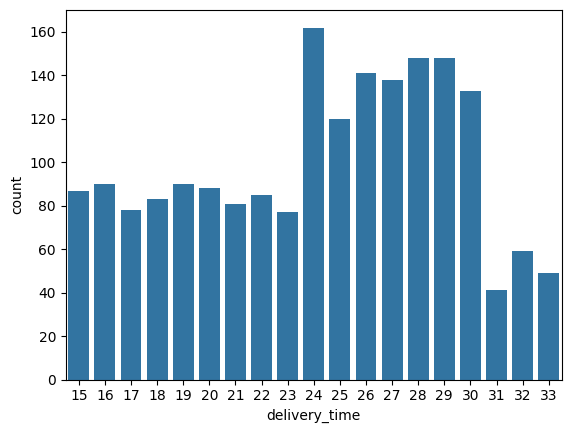

In [ ]:
sns.countplot(data=df, x='delivery_time')
plt.show()

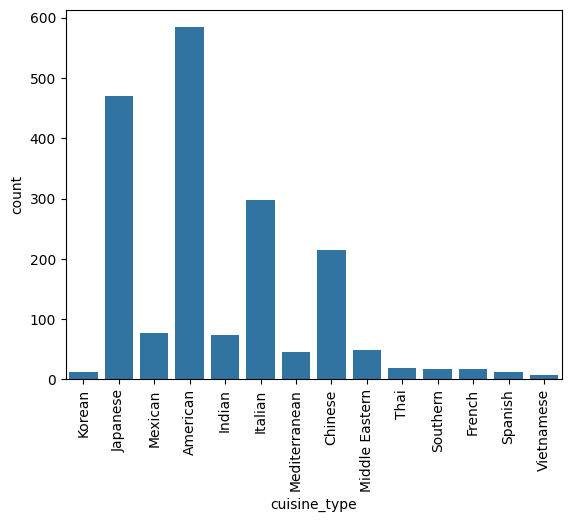

In [ ]:
# Bar plot for the cuisine_type variable
sns.countplot(data=df, x='cuisine_type');
plt.xticks(rotation=90)
plt.show()

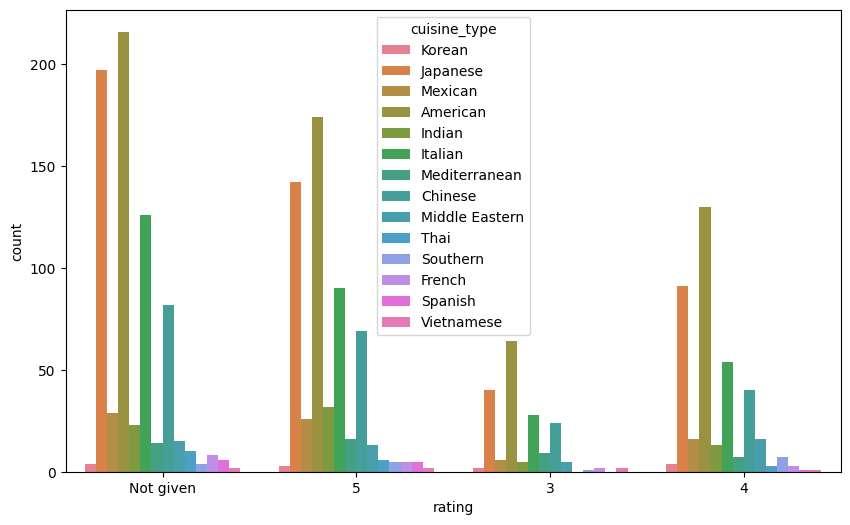

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(data= df, x='rating', hue='cuisine_type')
plt.show()

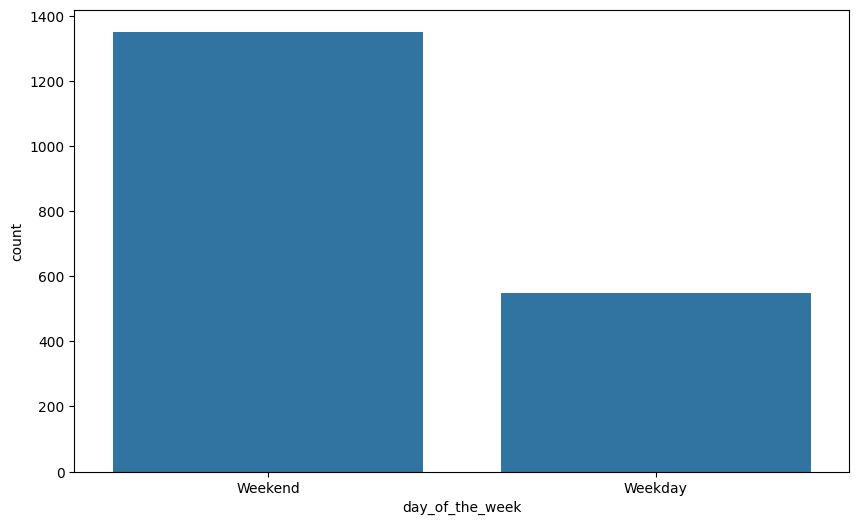

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data= df, x='day_of_the_week')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Top 30 restaurants

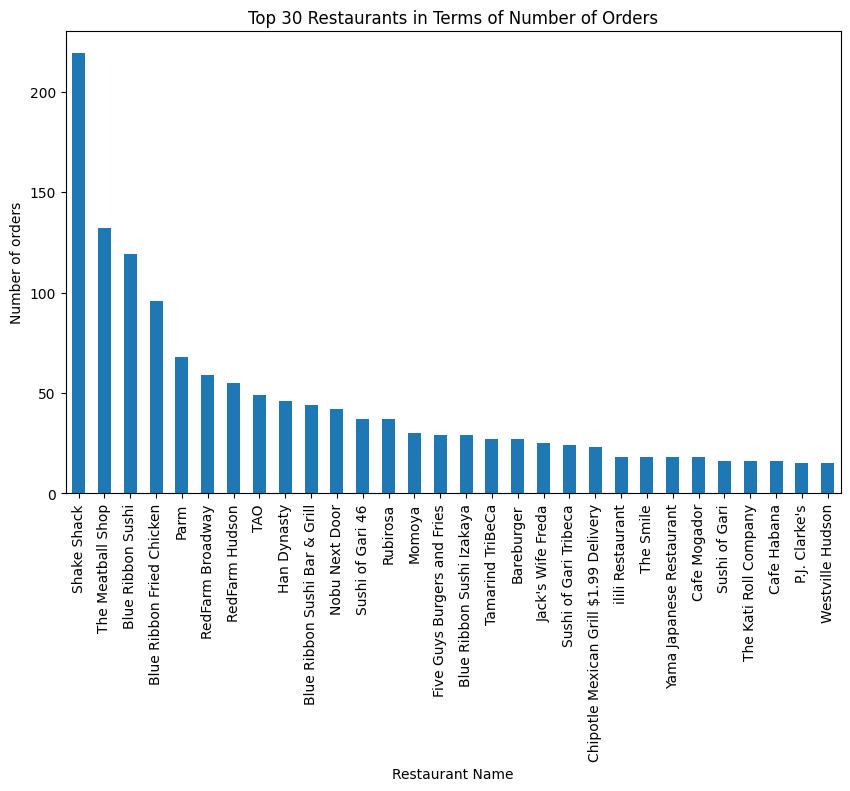

In [ ]:
top_30=df['restaurant_name'].value_counts().head(30)
top_30.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Restaurant Name')
plt.ylabel('Number of orders')
plt.title('Top 30 Restaurants in Terms of Number of Orders')
plt.show()


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
top_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


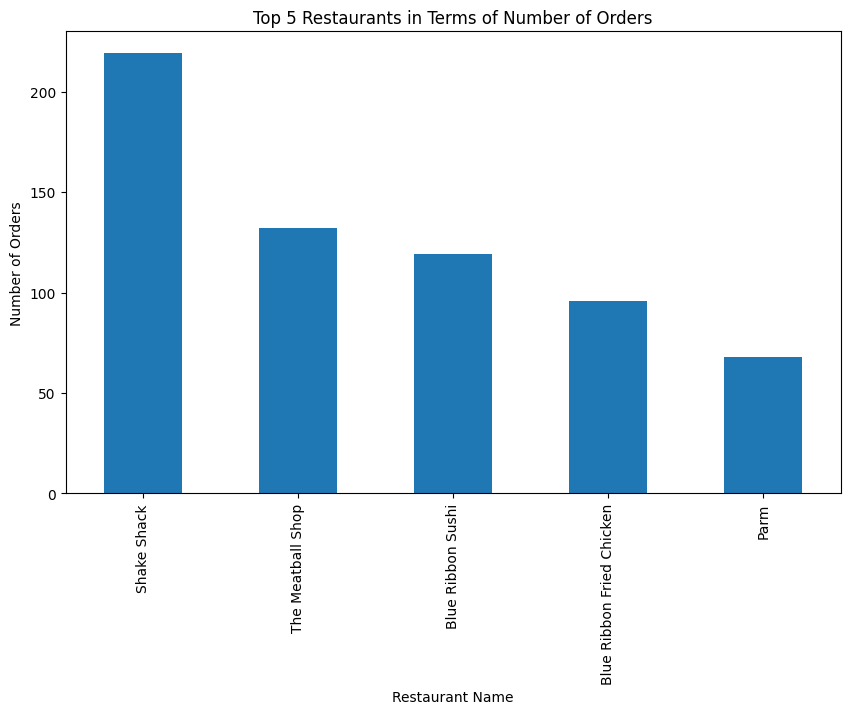

In [ ]:
top_restaurants.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.title('Top 5 Restaurants in Terms of Number of Orders')
plt.show()

#### Observations:Top restaurants with the most orders
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                         68



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
df.groupby('day_of_the_week')['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean             11
                 Southern           11
                 Spanish            11
                 Vietnamese          4
Name: count, dtype: int64

#### Observations:The most popular cuisine on the weekend is American


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
df[df['cost_of_the_order'] > 20].shape[0] / df.shape[0] * 100

29.24130663856691

#### Observations:29.2% of orders cost more than 20 dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
df['delivery_time'].mean().round(2)

np.float64(24.16)

#### Observations:The mean delivery time is 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:These are the customer IDs and the number of orders placed:
52832 -	13 orders
47440- 10 orders
83287- 9 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


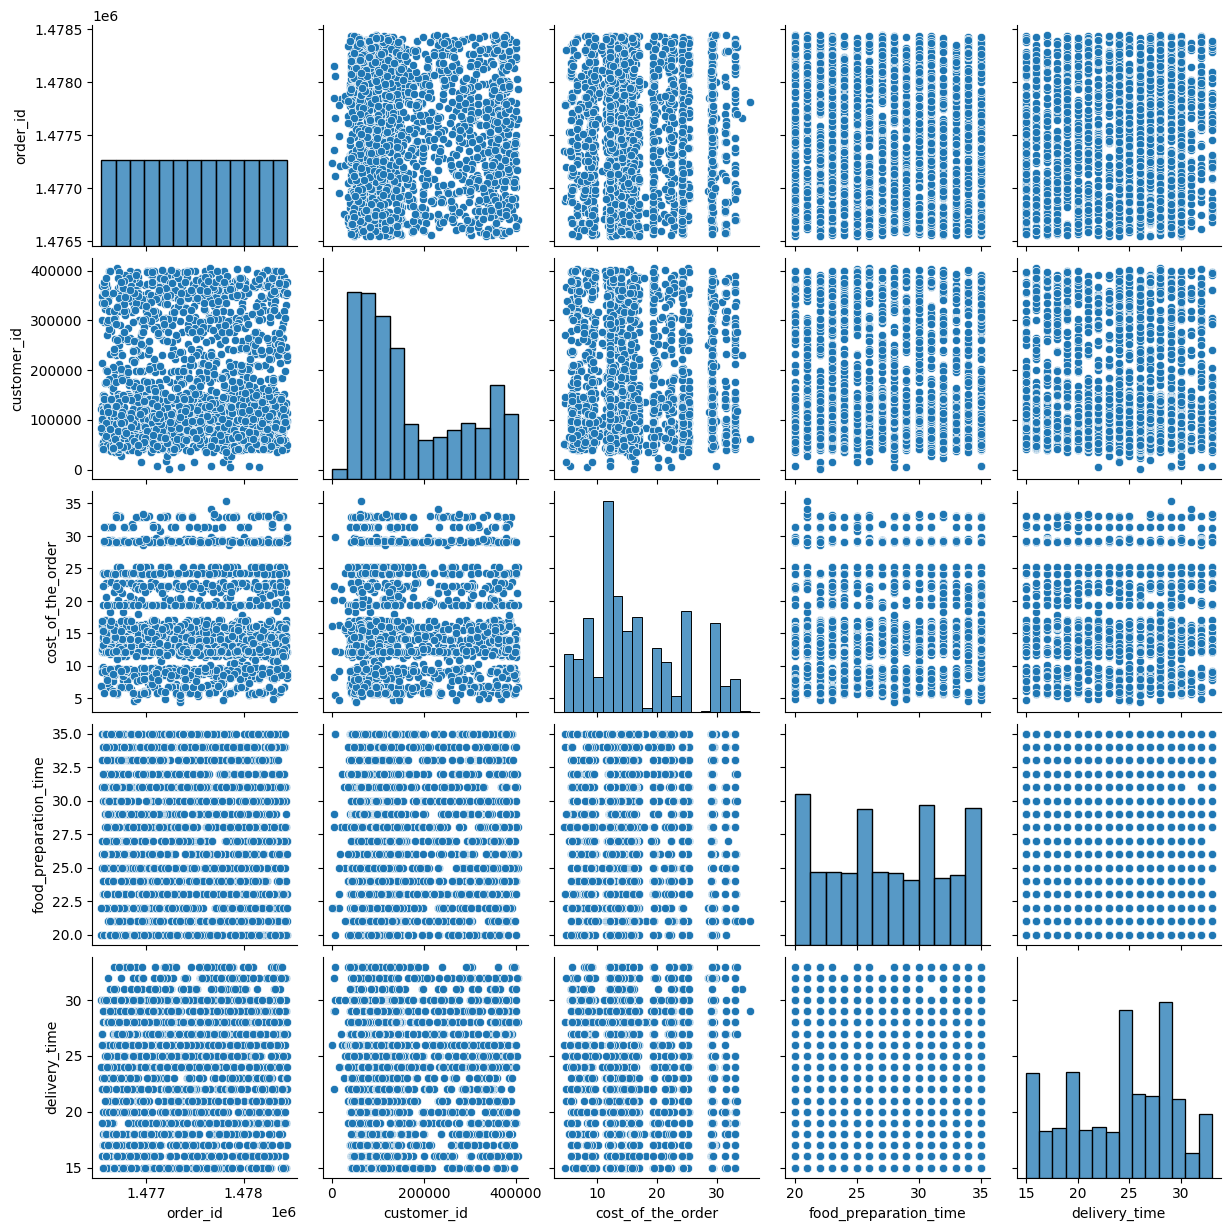

In [ ]:
# Write the code here
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

In [ ]:
#Replaced to not given rating with a 0 to do a correlation

In [ ]:
df['rating']= df['rating'].replace('Not given', 0)

<Axes: >

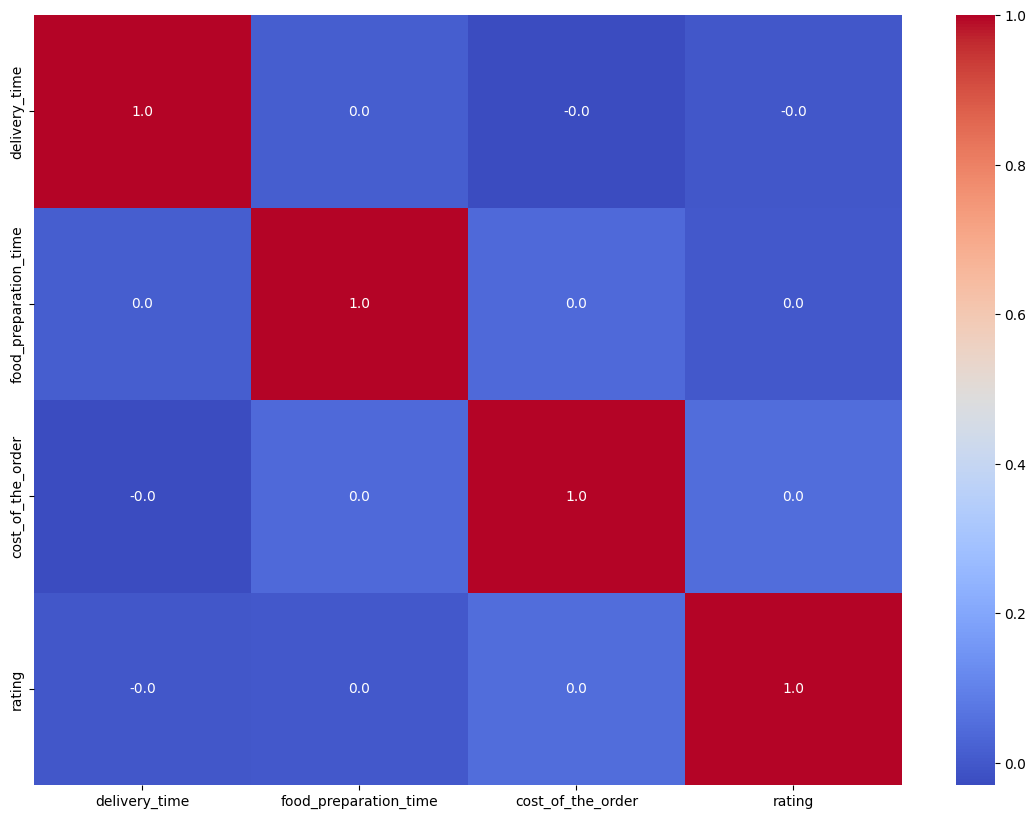

In [ ]:
# Check for correlation among numerical variables
num_var = ['delivery_time','food_preparation_time','cost_of_the_order','rating']
corr = df[num_var].corr()

# Plot the heatmap
plt.figure(figsize = (14, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
        fmt = ".1f",
        xticklabels = corr.columns,
        yticklabels = corr.columns)

In [ ]:
##There is no correlation among the variables

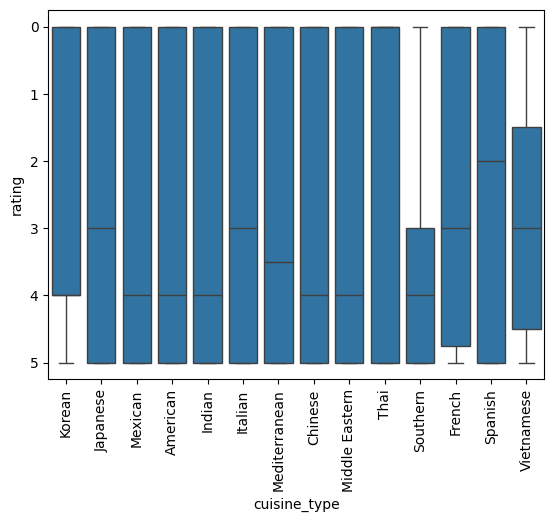

In [ ]:
sns.boxplot(data=df, x='cuisine_type', y='rating') ;
plt.xticks(rotation=90)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# make sure NotGiven is not 0
df2 = df[df['rating'] != 'Not given'] # filtering the data

In [ ]:
df2['rating'] = df2['rating'].astype(int)
mean = df2.groupby("restaurant_name")['rating'].mean()
mean = mean[mean > 4]

<ipython-input-66-abc626ac37b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['rating'] = df2['rating'].astype(int)


In [ ]:
restaurant_filtered = df2.groupby("restaurant_name")['rating'].sum()
restaurant_filtered = restaurant_filtered.sort_values(ascending = False)
restaurant_filtered= restaurant_filtered= restaurant_filtered[restaurant_filtered > 50]

In [ ]:
for restaurant_name in restaurant_filtered.index:
    print(restaurant_name)

Shake Shack
The Meatball Shop
Blue Ribbon Sushi
Blue Ribbon Fried Chicken
RedFarm Broadway
Parm
RedFarm Hudson
TAO
Han Dynasty
Blue Ribbon Sushi Bar & Grill
Nobu Next Door
Rubirosa
Momoya
Tamarind TriBeCa
Five Guys Burgers and Fries
Jack's Wife Freda
Blue Ribbon Sushi Izakaya
Sushi of Gari 46
Bareburger
Chipotle Mexican Grill $1.99 Delivery
Sushi of Gari Tribeca
Cafe Mogador
ilili Restaurant
The Smile
J. G. Melon


#### Observations:
The restaurant above will be the ones getting a promotional offer starting with Shake Shack

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here
# revenue for orders with cost greater than 20
revenue = df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum()

#revenue for orders with cost between 5 and 20
revenue1 = df[(df['cost_of_the_order'] <= 20) & (df['cost_of_the_order'] > 5)]['cost_of_the_order'].sum()

revenue = revenue*0.25 + revenue1*0.15
revenue


np.float64(6166.303)

#### Observations:
The revenue will be 6,166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
total_time= df['delivery_time'] + df['food_preparation_time']

more_than_60 = total_time[total_time > 60]
more_than_60= more_than_60.shape[0] / df.shape[0] * 100
print(more_than_60)

10.537407797681771


#### Observations:10.53% of orders take more than 60 minutes to be delivered


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
- Delivery time is higher on the weekday compared to the weekends
*  The restaurant has more orders on the weekends than on the weekdays
-Around 39% of the orders do not have a rating
- The net revenue is  $6,166.30
-Most people prefer to order American food regardless of the day of the week

### Recommendations:

*  Hire more people to work on the weekdays that way delivery time can decrease
-Shake Shack has the highest amount of orders, therefore you can set a higher fee
-Ask customers to leave a rating and get coupons or a free meal
-We can add more American restaurants to the list of restaurants since that is what people order the most

---

In [ ]:
!pip install nbconvert

In [ ]:
! jupyter nbconvert --to html  'FDS_Project_LearnerNotebook_FullCode.ipynb'

[NbConvertApp] WARNING | pattern 'FDS_Project_LearnerNotebook_FullCode.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answe